In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats

In [7]:
class case:
    def __init__(name, N, mu, sigma, prior,number):
        name.N = N
        name.mu = mu
        name.sigma = sigma
        name.prior = prior
        name.number = number
        
    def dataset(name):
        dist = [0,name.prior[0], np.sum(name.prior[0:2]), np.sum(name.prior[0:3])]
        random0 = np.random.rand(name.N)
        L = np.zeros((1,name.N))
        x = np.zeros((2,name.N))
        for i in range(name.number):
            #if (random0 >= dist[i] && random0 <= dist[i+1]):
            indices = np.where(np.logical_and(random0 >= dist[i], random0 < dist[i+1]) == True)
            L[0, indices] = i * np.ones(len(indices))
            for k in indices[0]:#indices
                x[:,k] = np.random.multivariate_normal(np.reshape(name.mu[:,i],(2)), name.sigma[:,:][i])
        return x, L
    
    def scattergen(name, x, L):
        color0 = ['#66ccff', '#cc66ff', '#ff66cc']
        label0 = ['True Label 1', 'True Label 2', 'True Label 3']
        plt.figure()
        for i in range(3):
            plt.scatter(x[0, np.where(L == i)], x[1, np.where(L == i)], marker='.', c=color0[i], label=label0[i])
        plt.xlabel(r'$x$', fontsize='12')
        plt.ylabel(r'$y$', fontsize='12')
        plt.legend(fontsize=12)
        plt.title('True label')
        
    def dicisiongen(name, x, L):
        dicisonl1 = scipy.stats.multivariate_normal(np.reshape(name.mu[:,0],(2)), name.sigma[:,:][0])
        dicisonl2 = scipy.stats.multivariate_normal(np.reshape(name.mu[:,1],(2)), name.sigma[:,:][1])
        dicisonl3 = scipy.stats.multivariate_normal(np.reshape(name.mu[:,2],(2)), name.sigma[:,:][2])
        D = np.zeros((1,name.N))
        for i in range(name.N):
            postiori_1 =  dicisonl1.pdf(x[:,i])*name.prior[0]
            postiori_2 =  dicisonl2.pdf(x[:,i])*name.prior[1]
            postiori_3 =  dicisonl3.pdf(x[:,i])*name.prior[2]
            if postiori_1 >= postiori_2 and postiori_1 >= postiori_3:
                D[0,i] = 0
            elif postiori_2 >= postiori_1 and postiori_2 >= postiori_3:
                D[0,i] = 1
            else:
                D[0,i] = 2
        return D
    
    def estimationgen(name, x, L, D):
        colorlist = ['#66ccff', '#cc66ff', '#ff66cc']
        markerlist = ['.','+','x']
        labellist = [['D=1, L=1', 'D=2, L=1', 'D=3, L=1'],['D=1, L=2', 'D=2, L=2', 'D=3, L=2'],['D=1, L=3', 'D=2, L=3', 'D=3, L=3']]
        name.confusionmatrix = np.zeros((3,3))
        plt.figure()
        for i in range(name.number):
            for j in range(name.number):
                plt.scatter(x[0, np.where(np.logical_and(D == j, L == i)[0] == True)], x[1,np.where(np.logical_and(D == j, L == i)[0] == True)], c=colorlist[j], marker=markerlist[i], label=labellist[i][j])
                name.confusionmatrix[j,i] = len(x[0, np.where(np.logical_and(D == j, L == i)[0] == True)][0])
        plt.xlabel(r'$x$', fontsize='10')
        plt.ylabel(r'$y$', fontsize='10')
        plt.legend(fontsize=10)
        plt.title('Estimated label')

Number of class 1 sample: 1518
Number of class 2 sample: 3399
Number of class 3 sample: 5083

Confusion Matrix:
[[1205.  109.   29.]
 [ 215. 3069.  125.]
 [  98.  221. 4929.]]

Probability of error:0.079700

Number of misclassification:797


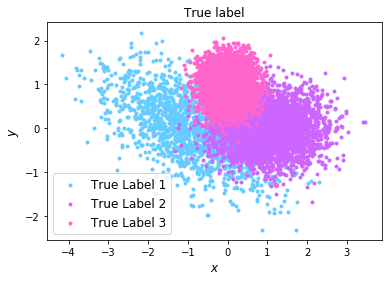

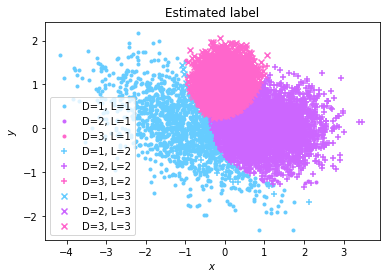

In [8]:
sigma = np.array([[[0.0 for k in range(2)] for j in range(2)] for i in range(3)])
N = 10000
mu = np.array([[-1, 1, 0], [0, 0, 1]])
sigma[:,:][0] = 0.1*np.array([[10,-4],[-4,5]]); sigma[:,:][1] = 0.1*np.array([[5,0],[0,2]]); sigma[:,:][2] = 0.1*np.eye(2)
prior = [0.15,0.35,0.5]
number = 3


case0 = case(N, mu, sigma, prior,number)
x,L = case0.dataset()
case0.scattergen(x, L)
D = case0.dicisiongen(x, L)
case0.estimationgen(x, L, D)


numberofsample_1 = np.count_nonzero(L == 0)
numberofsample_2 = np.count_nonzero(L == 1)
numberofsample_3 = np.count_nonzero(L == 2)
print('Number of class 1 sample: %d'%numberofsample_1)
print('Number of class 2 sample: %d'%numberofsample_2)
print('Number of class 3 sample: %d'%numberofsample_3)
print()

print('Confusion Matrix:')
print(case0.confusionmatrix)
print()

pr_error = 1 - (case0.confusionmatrix[0,0]+case0.confusionmatrix[1,1]+case0.confusionmatrix[2,2])/np.sum(case0.confusionmatrix)
print('Probability of error:%f'%pr_error)
print()

numberofmis = N - (case0.confusionmatrix[0,0]+case0.confusionmatrix[1,1]+case0.confusionmatrix[2,2])
print('Number of misclassification:%d'%numberofmis)
plt.show()